In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import re
import shutil
import string


from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(7613, 5)

In [4]:
# url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# dataset = tf.keras.utils.get_file("aclImdb_v1", url,
#                                     untar=True, cache_dir='.',
#                                     cache_subdir='')

# dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

In [5]:
# os.listdir(dataset_dir)

In [6]:
batch_size = 32
seed = 42

In [7]:
# for text_batch, label_batch in raw_train_ds.take(1):
# #   for i in range(3):
# #     print("Review", text_batch.numpy()[i])
# #     print("Label", label_batch.numpy()[i])
    
#     testtt= text_batch.numpy()[1]

In [8]:
print(testtt)

NameError: name 'testtt' is not defined

In [ ]:
# print("Label 0 corresponds to", raw_train_ds.class_names[0])
# print("Label 1 corresponds to", raw_train_ds.class_names[1])

In [9]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


In [10]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [11]:
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [12]:
# # Make a text-only dataset (without labels), then call adapt
# train_text = raw_train_ds.map(lambda x, y: x)
# vectorize_layer.adapt(train_text)

In [13]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [14]:
test_ds = raw_test_ds.map(vectorize_text)

In [15]:
# # retrieve a batch (of 32 reviews and labels) from the dataset
# text_batch, label_batch = next(iter(raw_train_ds))
# first_review, first_label = text_batch[0], label_batch[0]
# print("Review", first_review)
# print("Label", raw_train_ds.class_names[first_label])
# print("Vectorized review", vectorize_text(first_review, first_label))

In [16]:
df.head

<bound method NDFrame.head of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...  

In [17]:
print((df.target == 1).sum())

3271


In [18]:
print((df.target == 0).sum())

4342


In [19]:
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"",text)
    
def remove_punct(text):
    translator = str.maketrans("","", string.punctuation)
    return text.translate(translator)
    
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
pattern = re.compile(r"https?://\S+|www\.\S+")
for t in df.text:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"",t))
    if len(matches) > 0:
        break

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
http://t.co/lHYXEOHY6C
@bbcmtd Wholesale Markets ablaze 


In [21]:
df["text"] = df.text.map(remove_URL)
df["text"] = df.text.map(remove_punct)

In [22]:
!pip install nltk

In [23]:
from nltk.corpus import stopwords

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hashan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [26]:
df["text"] = df.text.map(remove_stopwords)

In [27]:
df.text

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                      m194 0104 utc5km volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [28]:
from collections import Counter

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter = counter_word(df.text)

In [29]:
len(counter)

17971

In [30]:
counter

Counter({'deeds': 2,
         'reason': 20,
         'earthquake': 50,
         'may': 88,
         'allah': 9,
         'forgive': 2,
         'us': 164,
         'forest': 65,
         'fire': 250,
         'near': 54,
         'la': 25,
         'ronge': 1,
         'sask': 1,
         'canada': 11,
         'residents': 8,
         'asked': 9,
         'shelter': 6,
         'place': 26,
         'notified': 1,
         'officers': 8,
         'evacuation': 50,
         'orders': 11,
         'expected': 15,
         '13000': 4,
         'people': 196,
         'receive': 2,
         'wildfires': 11,
         'california': 117,
         'got': 112,
         'sent': 13,
         'photo': 41,
         'ruby': 1,
         'alaska': 6,
         'smoke': 48,
         'pours': 1,
         'school': 66,
         'rockyfire': 4,
         'update': 37,
         'hwy': 9,
         '20': 26,
         'closed': 20,
         'directions': 1,
         'due': 31,
         'lake': 14,
         'co

In [31]:
counter.most_common(5)

[('like', 345), ('im', 299), ('amp', 298), ('fire', 250), ('get', 229)]

In [32]:
num_unique_words = len(counter)

In [33]:
train_size = int(df.shape[0]*0.8)

train_df = df[:train_size]
val_df = df[train_size:]

train_sentences = train_df.text.to_numpy()
train_labels = train_df.target.to_numpy()
val_sentences = val_df.text.to_numpy()
val_labels = val_df.target.to_numpy()

In [34]:
print(train_sentences) 

print(train_labels) 


['deeds reason earthquake may allah forgive us'
 'forest fire near la ronge sask canada'
 'residents asked shelter place notified officers evacuation shelter place orders expected'
 ... 'feel like sinking unhappiness take quiz'
 'sinking music video tv career brooke hogan thanking dad free publicityalthough doubt help'
 'supernovalester feel bad literally feel feeling heart sinking bc didnt get anyone ugh jfc']
[1 1 1 ... 0 0 0]


In [35]:
train_sentences.shape, val_sentences.shape

((6090,), (1523,))

In [36]:
# No need of this
!pip install keras

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences)

In [38]:
word_index = tokenizer.word_index

In [39]:
word_index

{'like': 1,
 'amp': 2,
 'fire': 3,
 'im': 4,
 'get': 5,
 'via': 6,
 'new': 7,
 'people': 8,
 'news': 9,
 'dont': 10,
 'emergency': 11,
 'one': 12,
 '2': 13,
 'us': 14,
 'video': 15,
 'disaster': 16,
 'burning': 17,
 'body': 18,
 'would': 19,
 'buildings': 20,
 'police': 21,
 'crash': 22,
 'first': 23,
 'california': 24,
 'still': 25,
 'man': 26,
 'got': 27,
 'know': 28,
 'day': 29,
 'back': 30,
 'going': 31,
 'two': 32,
 'time': 33,
 'full': 34,
 'accident': 35,
 'see': 36,
 'world': 37,
 'attack': 38,
 'nuclear': 39,
 'youtube': 40,
 'may': 41,
 'love': 42,
 'go': 43,
 'rt': 44,
 'many': 45,
 'cant': 46,
 '3': 47,
 'watch': 48,
 'collapse': 49,
 'dead': 50,
 'today': 51,
 'car': 52,
 'mass': 53,
 'want': 54,
 'years': 55,
 'work': 56,
 'train': 57,
 'last': 58,
 'good': 59,
 'think': 60,
 'families': 61,
 'hiroshima': 62,
 'life': 63,
 'fires': 64,
 'best': 65,
 'could': 66,
 'say': 67,
 'u': 68,
 'death': 69,
 'hot': 70,
 'forest': 71,
 'way': 72,
 'killed': 73,
 'need': 74,
 'legion

In [40]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [41]:
custom_word = ['watch plan year']
print(custom_word)
custom_sequences= tokenizer.texts_to_sequences(custom_word)
print(custom_sequences)

['watch plan year']
[[48, 136, 103]]


In [42]:
print(train_sentences[1:2])
print(train_sequences[1:2])

['forest fire near la ronge sask canada']
[[71, 3, 129, 576, 5670, 5671, 1283]]


In [43]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 35

train_padded = pad_sequences(train_sequences, maxlen = max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen = max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((6090, 35), (1523, 35))

In [44]:
custom_padded = pad_sequences(custom_sequences, maxlen = max_length, padding="post", truncating="post")

custom_padded.shape

(1, 35)

In [45]:
train_padded[10]

array([520,   8, 395, 156, 297, 411,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0])

In [46]:
print(custom_word)
print(custom_sequences)
print(custom_padded)

['watch plan year']
[[48, 136, 103]]
[[ 48 136 103   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [47]:
print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

three people died heat wave far
[520, 8, 395, 156, 297, 411]
[520   8 395 156 297 411   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [48]:
reverse_word_index=dict([(idx,word) for (word, idx) in word_index.items()])

In [49]:
reverse_word_index

{1: 'like',
 2: 'amp',
 3: 'fire',
 4: 'im',
 5: 'get',
 6: 'via',
 7: 'new',
 8: 'people',
 9: 'news',
 10: 'dont',
 11: 'emergency',
 12: 'one',
 13: '2',
 14: 'us',
 15: 'video',
 16: 'disaster',
 17: 'burning',
 18: 'body',
 19: 'would',
 20: 'buildings',
 21: 'police',
 22: 'crash',
 23: 'first',
 24: 'california',
 25: 'still',
 26: 'man',
 27: 'got',
 28: 'know',
 29: 'day',
 30: 'back',
 31: 'going',
 32: 'two',
 33: 'time',
 34: 'full',
 35: 'accident',
 36: 'see',
 37: 'world',
 38: 'attack',
 39: 'nuclear',
 40: 'youtube',
 41: 'may',
 42: 'love',
 43: 'go',
 44: 'rt',
 45: 'many',
 46: 'cant',
 47: '3',
 48: 'watch',
 49: 'collapse',
 50: 'dead',
 51: 'today',
 52: 'car',
 53: 'mass',
 54: 'want',
 55: 'years',
 56: 'work',
 57: 'train',
 58: 'last',
 59: 'good',
 60: 'think',
 61: 'families',
 62: 'hiroshima',
 63: 'life',
 64: 'fires',
 65: 'best',
 66: 'could',
 67: 'say',
 68: 'u',
 69: 'death',
 70: 'hot',
 71: 'forest',
 72: 'way',
 73: 'killed',
 74: 'need',
 75: 'le

In [50]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx,"?") for idx in sequence])

In [51]:
decode_text = decode(train_sequences[10])

print(train_sentences[10])
print(train_sequences[10])
print(decode_text)

three people died heat wave far
[520, 8, 395, 156, 297, 411]
three people died heat wave far


In [52]:
decode_text = decode(custom_sequences[0])
print(custom_word)
print(custom_sequences)
print(decode_text)

['watch plan year']
[[48, 136, 103]]
watch plan year


In [53]:
from tensorflow.keras import layers

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

model.add(layers.LSTM(64, dropout=0.1))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 32)            575072    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 599,969
Trainable params: 599,969
Non-trainable params: 0
_________________________________________________________________


In [54]:
# model2 = tf.keras.Sequential([
#     # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
#     tf.keras.layers.Embedding(num_unique_words, max_length),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_length)),
# #    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#     # use ReLU in place of tanh function since they are very good alternatives of each other.
#     tf.keras.layers.Dense(max_length, activation='relu'),
#     # Add a Dense layer with 6 units and softmax activation.
#     # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
#     tf.keras.layers.Dense(6, activation='softmax')
# ])
# model2.summary()

In [55]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [56]:
# loss = keras.losses.BinaryCrossentropy(from_logits=False)
# optim = keras.optimizers.Adam(lr=0.001)
# metrics = ["accuracy"]

# model2.compile(loss=loss, optimizer=optim, metrics=metrics)

In [57]:
history = model.fit(train_padded, train_labels, epochs=20, validation_data=(val_padded, val_labels),verbose=2)

Epoch 1/20
191/191 - 12s - loss: 0.6367 - accuracy: 0.6356 - val_loss: 0.4955 - val_accuracy: 0.7781
Epoch 2/20
191/191 - 6s - loss: 0.3625 - accuracy: 0.8553 - val_loss: 0.4626 - val_accuracy: 0.7912
Epoch 3/20
191/191 - 6s - loss: 0.2143 - accuracy: 0.9235 - val_loss: 0.5446 - val_accuracy: 0.7656
Epoch 4/20
191/191 - 6s - loss: 0.1355 - accuracy: 0.9583 - val_loss: 0.6691 - val_accuracy: 0.7564
Epoch 5/20
191/191 - 6s - loss: 0.1060 - accuracy: 0.9719 - val_loss: 0.5382 - val_accuracy: 0.7708
Epoch 6/20
191/191 - 7s - loss: 0.0902 - accuracy: 0.9745 - val_loss: 0.7329 - val_accuracy: 0.7459
Epoch 7/20
191/191 - 8s - loss: 0.0831 - accuracy: 0.9767 - val_loss: 0.9030 - val_accuracy: 0.7420
Epoch 8/20
191/191 - 7s - loss: 0.0712 - accuracy: 0.9764 - val_loss: 1.1155 - val_accuracy: 0.7380
Epoch 9/20
191/191 - 7s - loss: 0.0691 - accuracy: 0.9739 - val_loss: 1.2171 - val_accuracy: 0.7374
Epoch 10/20
191/191 - 7s - loss: 0.0562 - accuracy: 0.9806 - val_loss: 1.0792 - val_accuracy: 0.752

In [58]:
# model2.fit(train_padded, train_labels, epochs=20, validation_data=(val_padded, val_labels),verbose=2)

In [59]:
history.history["loss"]

[0.6366660594940186,
 0.36250072717666626,
 0.21428245306015015,
 0.13545143604278564,
 0.1059989407658577,
 0.0901525542140007,
 0.08311797678470612,
 0.07116499543190002,
 0.06911762058734894,
 0.05621498078107834,
 0.05404724180698395,
 0.04978593438863754,
 0.040236007422208786,
 0.0404687225818634,
 0.04696941748261452,
 0.03855988010764122,
 0.04611442610621452,
 0.03831958398222923,
 0.03636204078793526,
 0.032395198941230774]

In [60]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 278s 346ms/step - loss: 3.8891 - accuracy: 0.5001
Loss:  3.889082908630371
Accuracy:  0.5001199841499329


In [61]:
# loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

In [62]:
# print("Test Loss", loss_and_metrics[0])
# print("Test Accuracy", loss_and_metrics[1])

In [63]:
# plot.subplot(2,1,1)
# plot.plot(history.history['acc'])
# plot.plot(history.history['val_acc'])
# plot.title('model accuracy')
# plot.ylabel('accuracy')
# plot.xlabel('epoch')
# plot.legend(['train', 'test'], loc='lower right')

In [96]:
# plot.subplot(2,1,2)
# plot.plot(history.history['loss'])
# plot.plot(history.history['val_loss'])
# plot.title('model loss')
# plot.ylabel('loss')
# plot.xlabel('epoch')
# plot.legend(['train', 'test'], loc='upper right')

In [64]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

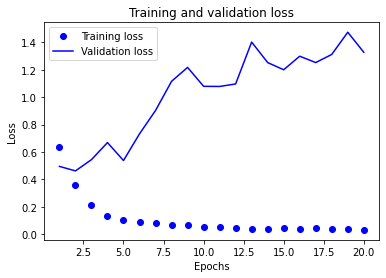

In [65]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

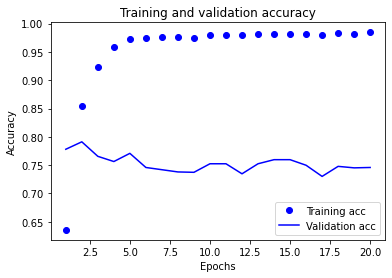

In [66]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [67]:
predications = model.predict(train_padded)
predications = [1 if p > 0.5 else 0 for p in predications]

In [68]:
print(train_sentences[9:50])
# print(train_labels[9:11])
print(predications[9:50])

['im afraid tornado coming area' 'three people died heat wave far'
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding'
 'raining flooding florida tampabay tampa 18 19 days ive lost count'
 'flood bago myanmar arrived bago'
 'damage school bus 80 multi car crash breaking' 'whats man' 'love fruits'
 'summer lovely' 'car fast' 'goooooooaaaaaal' 'ridiculous' 'london cool'
 'love skiing' 'wonderful day' 'looooool' 'wayi cant eat shit'
 'nyc last week' 'love girlfriend' 'cooool' 'like pasta' 'end'
 'bbcmtd wholesale markets ablaze' 'always try bring heavy metal rt'
 'africanbaze breaking newsnigeria flag set ablaze aba'
 'crying set ablaze' 'plus side look sky last night ablaze'
 'phdsquares mufc theyve built much hype around new acquisitions doubt set epl ablaze season'
 'inec office abia set ablaze'
 'barbados bridgetown jamaica \x89ûò two cars set ablaze santa cruz \x89ûó head st elizabeth police superintende'
 'ablaze lord' 'check nsfw' 'outside

In [69]:
predications = model.predict(custom_padded)
predications = [1 if p > 0.5 else 0 for p in predications]

In [70]:
print(custom_word)
print(predications)

['watch plan year']
[0]


In [71]:
custom_word_two = ['raining and fl outside']
print(custom_word_two)
custom_sequences_two= tokenizer.texts_to_sequences(custom_word_two)
print(custom_sequences_two)
predications2 = model.predict(custom_sequences_two)
# print(custom_word_two)
print(predications2)
if(predications2 > 0.6):
    print("Max")
elif(predications2 > 0.3):
    print("Mid")
else:
    print("Min")

['raining and flood outside']
[[2814, 99, 647]]
[[0.44558135]]
Mid


In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 32)            575072    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 599,969
Trainable params: 599,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# !mkdir -p saved_model
# model.save('saved_model/my_model')

In [ ]:
# new_complaint = ['Your service is not good']
# seq = tokenizer.texts_to_sequences(new_complaint)
# # train_padded = pad_sequences(train_sequences, maxlen = max_length, padding="post", truncating="post")
# padded = pad_sequences(seq, maxlen = max_length, padding="post", truncating="post")
# pred = model.predict(padded)
# print(pred, labels[np.argmax(pred)])

In [73]:
twt = ['i just need to run more runs']
twt = tokenizer.texts_to_sequences(twt)
print (twt)

[[74, 317, 1248]]


In [74]:
twt = tokenizer.texts_to_sequences(['token testing hello '])
print (twt)

[[1372]]


In [ ]:
# new_complaint = ['Your service is not good']
# seq = tokenizer.texts_to_sequences(new_complaint)
# padded = pad_sequences(seq, maxlen = max_length, padding="post", truncating="post")
# predications = model.predict(padded)
# predications = [1 if p > 0.5 else 0 for p in predications]

In [75]:
import numpy as np

In [76]:
from tensorflow.keras.models import load_model

In [77]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [78]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Hashan\AppData\Local\Temp\tmp8dmabljv\assets


INFO:tensorflow:Assets written to: C:\Users\Hashan\AppData\Local\Temp\tmp8dmabljv\assets


In [108]:
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(
    saved_model_dir, input_arrays=['inputA'], input_shapes={'inputA': [1, 640, 640, 1]})


NameError: name 'saved_model_dir' is not defined

In [79]:
with open("enable.tflite","wb") as f: f.write(tflite_model)

In [80]:
interpreter = tf.lite.Interpreter(model_path="enable.tflite")

In [81]:
interpreter.allocate_tensors()

In [82]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [98]:
print(np.random.random_sample(input_shape))

[[0.37396673 0.189047   0.25579477 0.96193035 0.36425127 0.02948219
  0.88832561 0.53780886 0.82566556 0.79715376 0.69736124 0.70019344
  0.54082047 0.81525076 0.16608105 0.60385749 0.57739392 0.99599053
  0.68078303 0.68837526 0.53492929 0.39978704 0.71078586 0.65525203
  0.4132962  0.29292467 0.34702453 0.43052154 0.28318902 0.37572919
  0.13241703 0.69576292 0.14614199 0.37667303 0.22988374]]


In [83]:
print(input_details);

[{'name': 'serving_default_embedding_input:0', 'index': 0, 'shape': array([ 1, 35]), 'shape_signature': array([-1, 35]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [100]:
print([lite[0][0] ,lite[0][1]])

[2814, 699]


In [94]:
lite = tokenizer.texts_to_sequences(['its raining out side '])
print (lite[0])

[2814, 699]


In [111]:
input_shape = input_details[0]['shape']
input_data = np.array(custom_padded, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

In [115]:
print(output_details)

[{'name': 'StatefulPartitionedCall:0', 'index': 39, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [119]:
output_data = interpreter.get_tensor(output_details[0]['index'])

ValueError: Tensor data is null. Run allocate_tensors() first

In [105]:
print(output_data)

NameError: name 'output_data' is not defined

In [110]:
print(custom_padded)

[[ 48 136 103   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
